In [4]:
import numpy
import math
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import scipy.special
from scipy.special import sph_harm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import ListedColormap
import skimage

%matplotlib qt5


def hydrogen_wf(n,l,m,X,Y,Z):
    R = numpy.sqrt(X**2+Y**2+Z**2)
    Theta = numpy.arccos(Z/R)
    Phi = numpy.arctan2(Y,X)
    
    rho = 2.*R/n
    s_harm=sph_harm(m, l, Phi, Theta)
    l_poly = scipy.special.genlaguerre(n-l-1,2*l+1)(rho)
    
    prefactor = numpy.sqrt((2./n)**3*math.factorial(n-l-1)/(2.*n*math.factorial(n+l)))
    wf = prefactor*numpy.exp(-rho/2.)*rho**l*s_harm*l_poly
    wf = numpy.nan_to_num(wf)
    return wf
  
dz=0.1
zmin=-10
zmax=10
x = numpy.arange(zmin,zmax,dz)
y = numpy.arange(zmin,zmax,dz)
z = numpy.arange(zmin,zmax,dz)
X,Y,Z = numpy.meshgrid(x,y,z) #X, Y, Z are 3d arrays that tell us the values of x, y, and z at every point in space

#Change these to change which orbital to plot
n=3
l=2
m=1

data = hydrogen_wf(n,l,m,X,Y,Z)
data = abs(data)**2

R = numpy.sqrt(X**2+Y**2+Z**2)

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.15, bottom=0.15)
im = plt.imshow(data[int((0-zmin)/dz),:,:], vmin=0, vmax = numpy.max(data), extent=[zmin,zmax,zmin,zmax])
plt.colorbar()
sli = Slider(plt.axes([0.25, 0.025, 0.65, 0.03]), "Y", z[0], z[len(z)-1], valinit=0)
ax.set_title("Hydrogen Orbital xz Slice (y="+str("%.2f"%sli.val)+"): n="+str(n)+", l="+str(l)+", m="+str(m))

def update(val):
    index = int((sli.val-zmin) / dz)
    im.set_data(data[index,:,:])
    ax.set_title("Hydrogen Orbital xz Slice (y="+str("%.2f"%sli.val)+"): n="+str(n)+", l="+str(l)+", m="+str(m))
       
sli.on_changed(update)
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6356\3312899869.py:18: RuntimeWarning: invalid value encountered in divide
  Theta = numpy.arccos(Z/R)


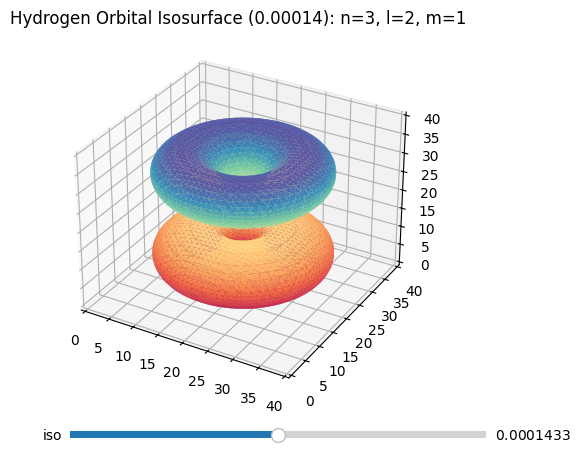

In [5]:
import numpy
import math
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import scipy.special
from scipy.special import sph_harm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import ListedColormap
import skimage
from skimage import measure

%matplotlib inline


def hydrogen_wf(n,l,m,X,Y,Z):
    R = numpy.sqrt(X**2+Y**2+Z**2)
    Theta = numpy.arccos(Z/R)
    Phi = numpy.arctan2(Y,X)
    
    rho = 2.*R/n
    s_harm=sph_harm(m, l, Phi, Theta)
    l_poly = scipy.special.genlaguerre(n-l-1,2*l+1)(rho)
    
    prefactor = numpy.sqrt((2./n)**3*math.factorial(n-l-1)/(2.*n*math.factorial(n+l)))
    wf = prefactor*numpy.exp(-rho/2.)*rho**l*s_harm*l_poly
    wf = numpy.nan_to_num(wf)
    return wf
  
dz=0.5
zmin=-10
zmax=10
x = numpy.arange(zmin,zmax,dz)
y = numpy.arange(zmin,zmax,dz)
z = numpy.arange(zmin,zmax,dz)
X,Y,Z = numpy.meshgrid(x,y,z) #X, Y, Z are 3d arrays that tell us the values of x, y, and z at every point in space
n=3
l=2
m=1
data = hydrogen_wf(n,l,m,X,Y,Z)
data = abs(data)**2
R = numpy.sqrt(X**2+Y**2+Z**2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([0,len(x)])
ax.set_ylim([0,len(y)])
ax.set_zlim([0,len(z)])
max_val = numpy.max(data)

verts, faces, _, _ = measure.marching_cubes(data, max_val/2, spacing = (1,1,1))
result=ax.plot_trisurf(verts[:,0], verts[:,1], faces, verts[:,2], cmap ='Spectral', lw=0)

sli = Slider(plt.axes([0.25, 0.025, 0.65, 0.03]), "iso", 0, max_val, valinit=max_val/2)
ax.set_title("Hydrogen Orbital Isosurface ("+str("%.5f"%sli.val)+"): n="+str(n)+", l="+str(l)+", m="+str(m))

def update(val):
    ax.clear()
    verts, faces = measure.marching_cubes(data, sli.val, spacing = (1,1,1))
    result = ax.plot_trisurf(verts[:,0], verts[:,1], faces, verts[:,2], cmap ='Spectral', lw=0)
    ax.set_xlim([0,len(x)])
    ax.set_ylim([0,len(y)])
    ax.set_zlim([0,len(z)])
    ax.set_title("Hydrogen Orbital Isosurface ("+str("%.5f"%sli.val)+"): n="+str(n)+", l="+str(l)+", m="+str(m))
           
sli.on_changed(update)
plt.show()